In [3]:
import sys
import os

# Append the directory of clean_cresci_2015.py to sys.path
sys.path.append(os.path.abspath("../Code"))

# Now you can import clean_cresci_2015
from clean_cresci_2015 import clean_cresci_2015
from import_data import ImportData
from evaluation import Evaluate 

## 1.- Clean Data

In [4]:
cleaner = clean_cresci_2015()
cleaner.clean_data()

Processing datasets in E13.csv...
Tweets: 2068037 rows, Users: 1481 rows
******FILES SAVED********


Processing datasets in FSF.csv...
Tweets: 22910 rows, Users: 1169 rows
******FILES SAVED********


Processing datasets in INT.csv...


c:\Users\jmanu\OneDrive - University of South Australia\Capstone\GIT\Code\clean_cresci_2015.py:22: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv(tweets_path, encoding='utf-8')


Tweets: 58925 rows, Users: 1337 rows
******FILES SAVED********


Processing datasets in TFP.csv...
Tweets: 563693 rows, Users: 469 rows
******FILES SAVED********


Processing datasets in TWT.csv...
Tweets: 114192 rows, Users: 845 rows
******FILES SAVED********




## 2.- Import Data

In [5]:
importer = ImportData()
data = importer.read_and_sample_data(bot_ratio=[.4, .6])
data['bot'].value_counts(normalize=True)

1    0.600172
0    0.399828
Name: bot, dtype: float64

# 2.2 Split Data 

In [6]:
splits = importer.split_dataset(data)
splits['X_train']

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,num_tweets,retweet_ratio,reply_ration,statuses_count,followers_count,friends_count,favourites_count,listed_count,account_age_years,followers_to_friends_ratio
331,443896569,0.066702,0.027823,0.012242,0.131306,0.200987,0.231104,0.431762,0.003720,0.050480,0.024946,0.016313,0.008147,0.000581,0.009211,0.285714,0.007361
237,819790166,0.002974,0.001294,0.000306,0.012408,0.010402,0.010759,0.018610,0.003817,0.054041,0.001398,0.000839,0.003402,0.000323,0.001316,0.142857,0.000900
409,363161920,0.257872,0.122938,0.013160,0.294655,0.496474,0.560288,0.995502,0.006238,0.096761,0.247081,0.015208,0.019108,0.000000,0.011842,0.285714,0.002935
762,1124512352,0.227079,0.000000,0.002865,0.241379,0.166667,0.153846,0.423077,0.261141,0.000000,0.571429,0.481481,0.775510,0.000000,0.000000,0.000000,0.464587
685,1176037879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.000000,0.000000,0.428571,0.555556,0.704082,0.000000,0.000000,0.000000,0.590446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1218429127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000735,0.000000,0.000000,0.001269,0.013699,0.018018,0.000000,0.000000,0.000000,0.173611
587,617710286,0.000000,0.003604,0.000001,0.005690,0.000000,0.000000,0.024982,0.000000,0.015752,0.022208,0.232877,0.156657,0.000000,0.000000,0.250000,0.339457
1032,621733211,0.000000,0.005405,0.000000,0.000000,0.000000,0.000000,0.008817,0.000000,0.063614,0.008249,0.287671,0.136637,0.000000,0.000000,0.250000,0.480769
768,1127827542,0.000000,0.000000,0.000000,0.172414,0.000000,0.000000,0.500000,0.000000,0.000000,0.628571,0.518519,0.938776,0.000000,0.000000,0.000000,0.413312


# 4.- Sample Model 

In [8]:
X_train = splits['X_train']
y_train = splits['y_train']
X_test = splits["X_test"]
y_test = splits["y_test"]

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train.values.ravel())  # Make sure y_train is in the correct shape

# Make predictions
predictions = knn.predict(X_test)

# Get prediction probabilities for the positive class)
positive_class_probabilities = knn.predict_proba(X_test)[:, 1]

c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
positive_class_probabilities

array([0.2, 1. , 0.6, 1. , 1. , 0. , 0. , 1. , 0. , 1. , 0. , 1. , 0. ,
       1. , 1. , 1. , 0.4, 0. , 1. , 1. , 1. , 1. , 0.6, 0.2, 0. , 0.6,
       1. , 0. , 0. , 1. , 1. , 1. , 1. , 1. , 0. , 0.4, 0.4, 1. , 0.6,
       0.4, 1. , 1. , 1. , 0.2, 1. , 1. , 1. , 1. , 1. , 1. , 0.4, 1. ,
       1. , 1. , 0.2, 1. , 0. , 1. , 1. , 0. , 1. , 1. , 0.6, 0. , 1. ,
       1. , 0. , 0.2, 1. , 1. , 0. , 0.2, 1. , 1. , 0.4, 0.8, 1. , 0. ,
       0. , 1. , 0.2, 0.2, 1. , 1. , 0.2, 0.4, 0.4, 1. , 0.4, 0.4, 0.8,
       0. , 0.2, 1. , 1. , 1. , 1. , 0.2, 1. , 1. , 1. , 0. , 0. , 1. ,
       0.4, 0.2, 0. , 0.2, 1. , 1. , 0. , 1. , 1. , 0.4, 0. , 1. , 0.4,
       1. , 1. , 1. , 0.4, 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 0. ,
       1. , 1. , 1. , 1. , 0. , 0. , 0.6, 1. , 0.4, 1. , 1. , 1. , 1. ,
       0.4, 0.2, 0. , 0.4, 0.4, 0. , 0. , 0.6, 0. , 1. , 0. , 0. , 0.6,
       0.4, 0. , 0. , 1. , 1. , 0.6, 1. , 1. , 1. , 1. , 0.2, 0.8, 1. ,
       0. , 0. , 0. , 0.2, 0.2])

## 5.- Evaluation

In [18]:
# Create an instance of the Evaluate class
evaluate = Evaluate(y_test, predictions, positive_class_probabilities)

In [19]:
evaluate.get_all_metrics()

{'Accuracy': 0.8448275862068966,
 'Confusion Matrix Rates': {'TN Rate': 0.3390804597701149,
  'FP Rate': 0.06321839080459771,
  'FN Rate': 0.09195402298850575,
  'TP Rate': 0.5057471264367817},
 'Precision': 0.8888888888888888,
 'Recall': 0.8461538461538461,
 'F1 Score': 0.8669950738916256,
 'MCC': 0.682250101843306,
 'AUC': 0.8947802197802197}

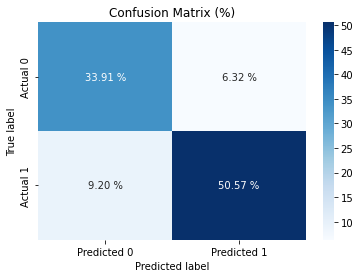

In [20]:
# Plotting the confusion matrix and ROC curve
evaluate.plot_confusion_matrix()

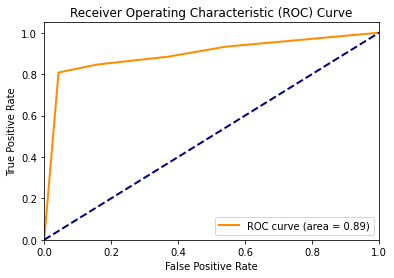

In [21]:
evaluate.plot_roc_curve()